In [1]:
# Deep Learning Libraries

from functools import partial
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, GlobalMaxPool1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, Activation, concatenate, SpatialDropout1D, TimeDistributed, Layer
from keras.utils import to_categorical
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.model_selection import GroupShuffleSplit
from functools import partial
from keras.callbacks import *
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score

import sklearn
from sklearn.metrics import confusion_matrix

# General Libraries
from scipy.io import loadmat, savemat
from scipy.fft import fft, fftfreq, ifft
import h5py
import os

# Statistics Libraries
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import ttest_rel, mannwhitneyu

Using TensorFlow backend.


# Load Performance Results

In [2]:
# Load Sleep Model Performance Results
sleep_filename = "/home/users/cellis42/Spectral_Explainability/PreTraining/Journal/sleep_model.mat"
sleep_f1_ind = loadmat(sleep_filename,appendmat=True)['f1_ind']

In [3]:
# MDD Model A - Baseline MDD Model
# MDD Model B - Pretrained MDD Model with Tuned Dense Layers Only
# MDD Model C - Pretrained MDD Model With Tuning of Whole Model B
# MDD Model D - Pretrained MDD Model Whole Model Tuning

In [3]:
# Load MDD Model A Performance Results
mdd_a_filename = "/home/users/cellis42/Spectral_Explainability/PreTraining/Journal/model_a_25_seed3.mat"

mdd_a_testing_metrics = loadmat(mdd_a_filename,appendmat=True)['testing_metrics']

mdd_a_bacc = mdd_a_testing_metrics[:,3]
mdd_a_sens = mdd_a_testing_metrics[:,1]
mdd_a_spec = mdd_a_testing_metrics[:,2]

In [4]:
# Load Pretrained MDD Model B Performance Results
mdd_b_filename = "/home/users/cellis42/Spectral_Explainability/PreTraining/Journal/model_b_25_seed3.mat"
mdd_b_testing_metrics = loadmat(mdd_b_filename,appendmat=True)['testing_metrics_all']

mdd_b_bacc = mdd_b_testing_metrics[...,3]
mdd_b_sens = mdd_b_testing_metrics[...,1]
mdd_b_spec = mdd_b_testing_metrics[...,2]

In [5]:
# Load Pretrained MDD Model C Performance Results
mdd_c_filename = "/home/users/cellis42/Spectral_Explainability/PreTraining/Journal/model_c_25_seed3.mat"
mdd_c_testing_metrics = loadmat(mdd_c_filename,appendmat=True)['testing_metrics_all']

mdd_c_bacc = mdd_c_testing_metrics[...,3]
mdd_c_sens = mdd_c_testing_metrics[...,1]
mdd_c_spec = mdd_c_testing_metrics[...,2]

In [6]:
# Load MDD Model D Performance Results
mdd_d_filename = "/home/users/cellis42/Spectral_Explainability/PreTraining/Journal/model_d_25_seed3.mat"
mdd_d_testing_metrics = loadmat(mdd_d_filename,appendmat=True)['testing_metrics_all']

mdd_d_bacc = mdd_d_testing_metrics[...,3]
mdd_d_sens = mdd_d_testing_metrics[...,1]
mdd_d_spec = mdd_d_testing_metrics[...,2]

In [7]:
print('BACC')
print(str(np.round(np.mean(mdd_a_bacc),4)) + ' (' +str(np.round(np.median(mdd_a_bacc),4))  + ') + ' + str(np.round(np.std(mdd_a_bacc),4)))
print(str(np.round(np.mean(mdd_b_bacc),4)) + ' (' +str(np.round(np.median(mdd_b_bacc),4))  + ') + ' + str(np.round(np.std(mdd_b_bacc),4)))
print(str(np.round(np.mean(mdd_c_bacc),4)) + ' (' +str(np.round(np.median(mdd_c_bacc),4))  + ') + ' + str(np.round(np.std(mdd_c_bacc),4)))
print(str(np.round(np.mean(mdd_d_bacc),4)) + ' (' +str(np.round(np.median(mdd_d_bacc),4))  + ') + ' + str(np.round(np.std(mdd_d_bacc),4)))

print('SENS')
print(str(np.round(np.mean(mdd_a_sens),4)) + ' (' +str(np.round(np.median(mdd_a_sens),4))  + ') + ' + str(np.round(np.std(mdd_a_sens),4)))
print(str(np.round(np.mean(mdd_b_sens),4)) + ' (' +str(np.round(np.median(mdd_b_sens),4))  + ') + ' + str(np.round(np.std(mdd_b_sens),4)))
print(str(np.round(np.mean(mdd_c_sens),4)) + ' (' +str(np.round(np.median(mdd_c_sens),4))  + ') + ' + str(np.round(np.std(mdd_c_sens),4)))
print(str(np.round(np.mean(mdd_d_sens),4)) + ' (' +str(np.round(np.median(mdd_d_sens),4))  + ') + ' + str(np.round(np.std(mdd_d_sens),4)))

print('SPEC')
print(str(np.round(np.mean(mdd_a_spec),4)) + ' (' +str(np.round(np.median(mdd_a_spec),4))  + ') + ' + str(np.round(np.std(mdd_a_spec),4)))
print(str(np.round(np.mean(mdd_b_spec),4)) + ' (' +str(np.round(np.median(mdd_b_spec),4))  + ') + ' + str(np.round(np.std(mdd_b_spec),4)))
print(str(np.round(np.mean(mdd_c_spec),4)) + ' (' +str(np.round(np.median(mdd_c_spec),4))  + ') + ' + str(np.round(np.std(mdd_c_spec),4)))
print(str(np.round(np.mean(mdd_d_spec),4)) + ' (' +str(np.round(np.median(mdd_d_spec),4))  + ') + ' + str(np.round(np.std(mdd_d_spec),4)))

BACC
0.8357 (0.8722) + 0.1513
0.86 (0.8884) + 0.1379
0.8716 (0.9055) + 0.134
0.8568 (0.8855) + 0.1389
SENS
0.9111 (1.0) + 0.1444
0.8863 (0.9718) + 0.1629
0.9101 (0.9743) + 0.1298
0.8825 (0.966) + 0.1627
SPEC
0.7603 (0.9485) + 0.3172
0.8336 (0.9901) + 0.2474
0.833 (0.9915) + 0.2571
0.8311 (0.9889) + 0.2489


# Comparison of Models A Through D - All Values

In [9]:
# Duplicate MDD Model A Performance
mdd_a_bacc_duplicate = np.repeat(np.expand_dims(np.squeeze(mdd_a_bacc),axis=1),10,axis=1)
mdd_a_sens_duplicate = np.repeat(np.expand_dims(np.squeeze(mdd_a_sens),axis=1),10,axis=1)
mdd_a_spec_duplicate = np.repeat(np.expand_dims(np.squeeze(mdd_a_spec),axis=1),10,axis=1)

In [10]:
# Concatenaste Performance Results
bacc_vals = np.array([np.ndarray.flatten(mdd_a_bacc_duplicate), np.ndarray.flatten(mdd_b_bacc),
             np.ndarray.flatten(mdd_c_bacc),np.ndarray.flatten(mdd_d_bacc)])

sens_vals = np.array([np.ndarray.flatten(mdd_a_sens_duplicate), np.ndarray.flatten(mdd_b_sens),
             np.ndarray.flatten(mdd_c_sens),np.ndarray.flatten(mdd_d_sens)])

spec_vals = np.array([np.ndarray.flatten(mdd_a_spec_duplicate), np.ndarray.flatten(mdd_b_spec),
             np.ndarray.flatten(mdd_c_spec),np.ndarray.flatten(mdd_d_spec)])


p_vals_bacc = np.ones((4,4)); t_stat_bacc = np.zeros((4,4)); #p_vals_u = np.ones((4,4));
p_vals_sens = np.ones((4,4)); t_stat_sens = np.zeros((4,4)); #p_vals_u = np.ones((4,4));
p_vals_spec = np.ones((4,4)); t_stat_spec = np.zeros((4,4)); #p_vals_u = np.ones((4,4));

for i in range(4):
    for j in range(4):
        if i > j:
            t_stat_bacc[i,j], p_vals_bacc[i,j] = ttest_rel(bacc_vals[i,:],bacc_vals[j,:])
            t_stat_sens[i,j], p_vals_sens[i,j] = ttest_rel(sens_vals[i,:],sens_vals[j,:])
            t_stat_spec[i,j], p_vals_spec[i,j] = ttest_rel(spec_vals[i,:],spec_vals[j,:])

In [11]:
pd.DataFrame(t_stat_bacc,index=['A','B','C','D'],columns=['-A','-B','-C','-D'])

,-A,-B,-C,-D
A,0.000000,0.000000,0.000000,0.0
B,1.947357,0.000000,0.000000,0.0
C,2.951017,2.811955,0.000000,0.0
D,1.679509,-2.025590,-3.502721,0.0


In [12]:
pd.DataFrame(p_vals_bacc,index=['A','B','C','D'],columns=['-A','-B','-C','-D'])

,-A,-B,-C,-D
A,1.000000,1.000000,1.000000,1.0
B,0.052616,1.000000,1.000000,1.0
C,0.003469,0.005316,1.000000,1.0
D,0.094307,0.043873,0.000546,1.0


In [14]:
p_vals_bacc_reshaped = []; p_vals_sens_reshaped = []; p_vals_spec_reshaped = [];
for row in range(1,np.shape(p_vals_bacc)[1]):
    for col in range(0,row):
        p_vals_bacc_reshaped.append(p_vals_bacc[row,col])
        p_vals_sens_reshaped.append(p_vals_sens[row,col])
        p_vals_spec_reshaped.append(p_vals_spec[row,col])

In [17]:
p_vals_bacc_reshaped_corrected = fdrcorrection(p_vals_bacc_reshaped)[1]; p_vals_bacc_corrected = np.ones_like(p_vals_bacc)
p_vals_sens_reshaped_corrected = fdrcorrection(p_vals_sens_reshaped)[1]; p_vals_sens_corrected = np.ones_like(p_vals_sens)
p_vals_spec_reshaped_corrected = fdrcorrection(p_vals_spec_reshaped)[1]; p_vals_spec_corrected = np.ones_like(p_vals_spec)


idx = 0
for row in range(1,np.shape(p_vals_bacc)[1]):
    for col in range(0,row):
        p_vals_bacc_corrected[row,col] = p_vals_bacc_reshaped_corrected[idx]
        p_vals_sens_corrected[row,col] = p_vals_sens_reshaped_corrected[idx]
        p_vals_spec_corrected[row,col] = p_vals_spec_reshaped_corrected[idx]

        idx += 1

In [42]:
pd.DataFrame(p_vals_bacc_corrected,index=['A','B','C','D'],columns=['-A','-B','-C','-D'])

,-A,-B,-C,-D
A,1.000000,1.000000,1.000000,1.0
B,0.063139,1.000000,1.000000,1.0
C,0.010408,0.010633,1.000000,1.0
D,0.094307,0.063139,0.003275,1.0


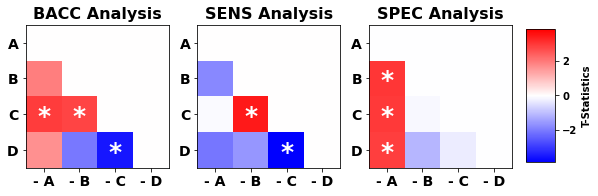

In [57]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
for idx in range(3):
    if idx == 0:
        t_stat = t_stat_bacc.copy()
        p_vals_corrected = p_vals_bacc_corrected.copy()
        title_val = 'BACC '
    elif idx == 1:
        t_stat = t_stat_sens.copy()
        p_vals_corrected = p_vals_sens_corrected.copy()
        title_val = 'SENS '
    elif idx == 2:
        t_stat = t_stat_spec.copy()
        p_vals_corrected = p_vals_spec_corrected.copy()
        title_val = 'SPEC '

    max_val = np.max(np.absolute(np.concatenate((t_stat_bacc,t_stat_sens,t_stat_spec))))
    
    t_stat2 = t_stat.copy()
    for i in range(4):
        for j in range(4):
            if t_stat[i,j] == 0:
                t_stat2[i,j] = np.nan
    im = ax[idx].imshow(t_stat,cmap='bwr',vmin = -1*max_val,vmax=max_val)
    ax[idx].set_yticks(np.arange(4))
    ax[idx].set_yticklabels(['A','B','C','D'],weight='bold',fontsize=14)
    ax[idx].set_xticks(np.arange(4))
    ax[idx].set_xticklabels(['- A','- B','- C','- D'],weight='bold',fontsize=14)
    ax[idx].set_title(title_val + 'Analysis',weight='bold',fontsize=16)
    for i in range(4):
        for j in range(4):
            if p_vals_corrected[i,j] < 0.05:
                ax[idx].text(j,i+0.07,'*',color='w',weight='bold',fontsize=25,verticalalignment='center',horizontalalignment='center')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.82, 0.32, 0.04, 0.37]) # left bottom width height
cb = fig.colorbar(im, cax=cbar_ax);
cb.set_label(label='T-Statistics',weight='bold')
plt.setp(cb.ax.get_yticklabels(),weight='bold');

plt.savefig('/home/users/cellis42/Spectral_Explainability/PreTraining/BHI2023/Performance_Testing_seed3.png')